**The spark Foundation- Data Science and Business Analytics Internship**


**Task-1 Predictions using supervised learning ML**

**Task By: Shivani Patel** 





**Import required Libraries**

In [ ]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline

In [ ]:
data = pd.read_csv('http://bit.ly/w-data')
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.shape

(25, 2)

In [ ]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

**Visualizing dataset**

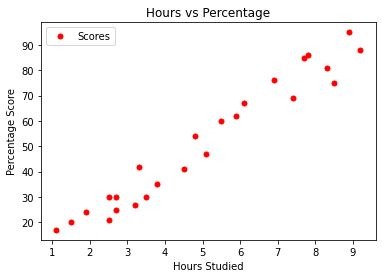

In [ ]:
data.plot(x='Hours', y='Scores', style='o', color='red', markersize=5)  
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

**Train, Test, Split data** 

In [ ]:
x= data.iloc[:,:-1].values
y = data.iloc[:,1].values

In [ ]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

**Train Algorithm**

In [ ]:
from sklearn.linear_model import LinearRegression  
regressor = LinearRegression()  
regressor.fit(X_train, y_train) 

LinearRegression()

**Visualize the model**

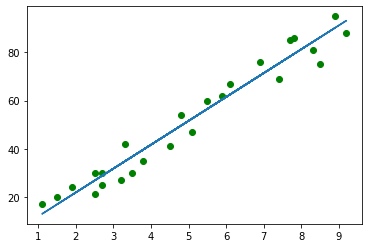

In [ ]:
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y, color = 'green')
plt.plot(x, line);
plt.show()

**Predictions**

In [ ]:
#Predict the scores
print(X_test) 
y_pred = regressor.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [ ]:
y_test

array([20, 27, 69, 30, 62])

In [ ]:
y_pred

array([16.88414476, 33.73226078, 75.357018  , 26.79480124, 60.49103328])

**Comparison Actual vs predicted**

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
df 

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [ ]:
def plot_result(Y_train, Y_test, train_predict, test_predict):
    actual = np.append(y_train, y_test)
    predictions = np.append(train_predict, test_predict)
    rows = len(actual)
    plt.figure(figsize=(12, 6), dpi=80)
    plt.plot(range(rows), actual)
    plt.plot(range(rows), predictions)
    plt.axvline(x=len(Y_train), color='r')
    plt.legend(['Actual', 'Predictions'])
    plt.xlabel('Observation number after given time steps')
    plt.ylabel('Return')
    plt.title('Actual and Predicted Values. The Red Line Separates The Training And Test Examples')

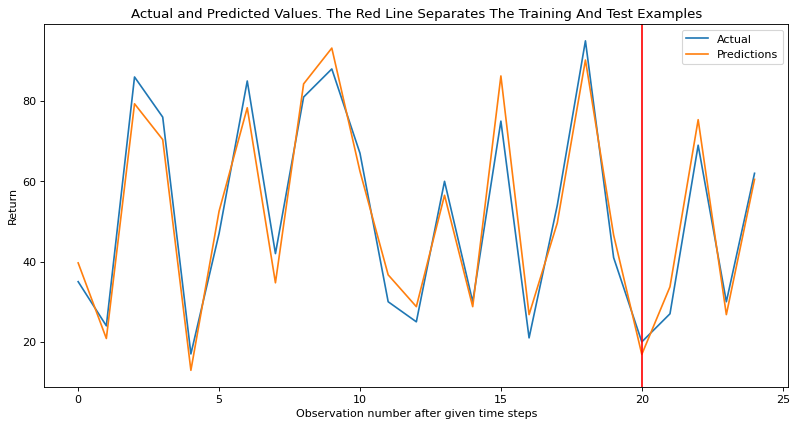

In [ ]:
# make predictions
train_predict = regressor.predict(X_train)
test_predict = regressor.predict(X_test)
plot_result(y_train, y_test, train_predict, test_predict)

In [ ]:
hours = 9.25
own_pred = regressor.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


**Evaluating the model**

In [ ]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 

Mean Absolute Error: 4.183859899002982
